<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/hm_linear_models_tasks_2022_fall_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание - линейная регрессия

### Работа с признаками (8 баллов)

Скачайте датасет из материалов к уроку или по ссылке https://raw.githubusercontent.com/jupiterzhuo/travel-insurance/master/travel%20insurance.csv 


Описание признаков:

* Agency — название страхового агентства
* Agency Type — тип страхового агентства
* Distribution Channel — канал продвижения страхового агентства
* Product Name — название страхового продукта
* Duration — длительность поездки (количество дней)
* Destination — направление поездки
* Net Sales — сумма продаж 
* Commission (in value) — комиссия страхового агентства
* Gender — пол застрахованного
* Age — возраст застрахованного

Ответ:
* Claim — потребовалась ли страховая выплата: «да» — 1, «нет» — 0

Обработайте пропущенные значения и примените написанные функции onehot_encode() и minmax_scale().

**Подсказка**: маску для категориальных признаков можно сделать фильтром cat_features_mask = (df.dtypes == "object").values

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [103]:
# Загрузка датасета
df = pd.read_csv("https://raw.githubusercontent.com/jupiterzhuo/travel-insurance/master/travel%20insurance.csv", \
                    header=None, na_values=["?"], names=['Agency',
                                                        'Agency Type ',
                                                        'Distribution Channel',
                                                        'Product Name',
                                                        'Claim',
                                                        'Duration',
                                                        'Destination',
                                                        'Ne Salesа',
                                                        'Commission (in value)',
                                                        'Gender',
                                                        'Age'])
df.drop(index=df.index [0], axis= 0 , inplace= True )
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
2,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
5,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63322,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35,12.25,M,31
63323,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40,14,F,40
63324,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18,6.3,M,57
63325,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18,6.3,M,63


Text(0.5, 1.0, 'Destination')

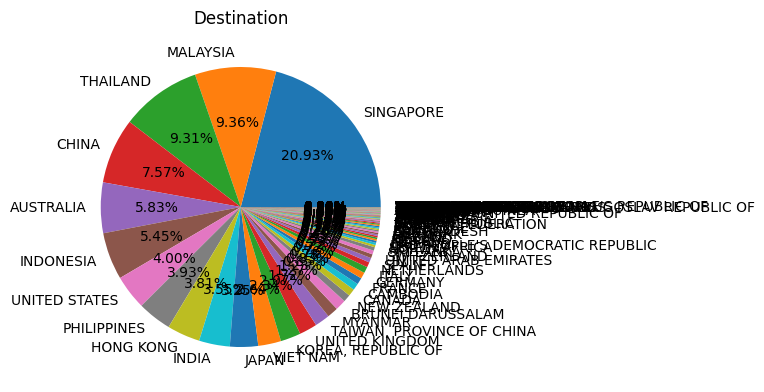

In [104]:
# Сравним отношение кол-ва значений фичи Destination
plt.figure(figsize = (20,10))
plt.subplot(231)
plt.pie(df['Destination'].value_counts(), labels = df['Destination'].value_counts().index, autopct = '%1.2f%%')
plt.title('Destination')

In [105]:
df['Destination'].value_counts().index

Index(['SINGAPORE', 'MALAYSIA', 'THAILAND', 'CHINA', 'AUSTRALIA', 'INDONESIA',
       'UNITED STATES', 'PHILIPPINES', 'HONG KONG', 'INDIA',
       ...
       'ARMENIA', 'SIERRA LEONE', 'TAJIKISTAN', 'MOLDOVA, REPUBLIC OF',
       'BOTSWANA', 'SEYCHELLES', 'SAMOA', 'NIGERIA', 'DOMINICAN REPUBLIC',
       'BOSNIA AND HERZEGOVINA'],
      dtype='object', length=149)

In [107]:
# Перекодируем строки в числа
df['Claim'] = np.where(df['Claim'] == 'Yes', 1,0)

In [108]:
# Создаем словарь процентных отношений
percentages = df.groupby('Destination').size() / len(df)
dct = percentages.to_dict()

df['Destination'] = df['Destination'].apply(lambda x: dct[x])


In [109]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,0.093642,-29,9.57,F,81
2,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,0.093642,-29,9.57,F,71
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,0.058333,-49.5,29.7,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,0.058333,-39.6,23.76,NaN,32
5,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,0.007185,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63322,JZI,Airlines,Online,Basic Plan,0,111,0.032546,35,12.25,M,31
63323,JZI,Airlines,Online,Basic Plan,0,58,0.075735,40,14,F,40
63324,JZI,Airlines,Online,Basic Plan,0,2,0.093642,18,6.3,M,57
63325,JZI,Airlines,Online,Basic Plan,0,3,0.026356,18,6.3,M,63


In [110]:
# заполняем пустые значение пола случайными
df = df.apply(lambda x: x.fillna(random.choice(['M','F'])), axis=1)
# перекодировка
df['Gender'] = np.where(df['Gender'] == 'F', 1,0)
df['Distribution Channel'] = np.where(df['Distribution Channel'] == 'Offline', 1,0)



# приведение формата столбцов
df['Duration'] = df['Duration'].astype(int)
df['Ne Salesа'] = df['Ne Salesа'].astype(float)
df['Commission (in value)'] = df['Commission (in value)'].astype(float)
df['Age'] = df['Age'].astype(int)

# фильтрация по длительности
df = df.loc[((df['Duration'] > 0) & (df['Duration'] < 1000))]

df = df[['Distribution Channel', 'Duration', 'Destination', 'Ne Salesа', 'Commission (in value)', 'Gender', 'Age', 'Claim']]

claim = df[df["Claim"] == 1]
not_claim = df[df["Claim"] == 0]
df



,Distribution Channel,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age,Claim
1,1,186,0.093642,-29.0,9.57,1,81,0
2,1,186,0.093642,-29.0,9.57,1,71,0
3,0,65,0.058333,-49.5,29.70,1,32,0
4,0,60,0.058333,-39.6,23.76,1,32,0
5,0,79,0.007185,-19.8,11.88,0,41,0
...,...,...,...,...,...,...,...,...
63322,0,111,0.032546,35.0,12.25,0,31,0
63323,0,58,0.075735,40.0,14.00,1,40,0
63324,0,2,0.093642,18.0,6.30,0,57,0
63325,0,3,0.026356,18.0,6.30,0,63,0


In [111]:
not_claim

,Distribution Channel,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age,Claim
1,1,186,0.093642,-29.0,9.57,1,81,0
2,1,186,0.093642,-29.0,9.57,1,71,0
3,0,65,0.058333,-49.5,29.70,1,32,0
4,0,60,0.058333,-39.6,23.76,1,32,0
5,0,79,0.007185,-19.8,11.88,0,41,0
...,...,...,...,...,...,...,...,...
63322,0,111,0.032546,35.0,12.25,0,31,0
63323,0,58,0.075735,40.0,14.00,1,40,0
63324,0,2,0.093642,18.0,6.30,0,57,0
63325,0,3,0.026356,18.0,6.30,0,63,0


In [112]:
claim

,Distribution Channel,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age,Claim
24,0,12,0.209314,94.00,23.50,0,34,1
249,0,10,0.209314,43.55,10.89,0,45,1
314,0,73,0.093074,16.00,0.00,0,36,1
420,0,11,0.209314,62.25,15.56,0,33,1
425,0,365,0.209314,187.85,46.96,0,32,1
...,...,...,...,...,...,...,...,...
63174,0,32,0.026356,12.00,0.00,1,35,1
63200,0,7,0.209314,20.00,5.00,0,30,1
63207,0,27,0.209314,60.00,15.00,1,30,1
63209,0,12,0.209314,21.00,5.25,0,28,1


In [113]:
from sklearn.utils import resample
# Downsampling
not_claim = resample(not_claim,
             replace=True,
             n_samples=len(claim),
             random_state=42)
df = pd.concat([claim, not_claim])
df

,Distribution Channel,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age,Claim
24,0,12,0.209314,94.00,23.50,0,34,1
249,0,10,0.209314,43.55,10.89,0,45,1
314,0,73,0.093074,16.00,0.00,0,36,1
420,0,11,0.209314,62.25,15.56,0,33,1
425,0,365,0.209314,187.85,46.96,0,32,1
...,...,...,...,...,...,...,...,...
49241,0,80,0.001942,112.00,0.00,0,36,0
6243,0,66,0.038073,21.00,0.00,0,36,0
17800,0,14,0.075735,43.00,0.00,0,36,0
53328,1,4,0.093642,30.00,10.50,1,39,0


In [114]:
df.shape

(1854, 8)

In [118]:
Y = df['Claim']
X = df = df.drop(columns=['Claim'])


In [119]:
X

,Distribution Channel,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age
24,0,12,0.209314,94.00,23.50,0,34
249,0,10,0.209314,43.55,10.89,0,45
314,0,73,0.093074,16.00,0.00,0,36
420,0,11,0.209314,62.25,15.56,0,33
425,0,365,0.209314,187.85,46.96,0,32
...,...,...,...,...,...,...,...
49241,0,80,0.001942,112.00,0.00,0,36
6243,0,66,0.038073,21.00,0.00,0,36
17800,0,14,0.075735,43.00,0.00,0,36
53328,1,4,0.093642,30.00,10.50,1,39


In [120]:
Y

24       1
249      1
314      1
420      1
425      1
        ..
49241    0
6243     0
17800    0
53328    0
38919    0
Name: Claim, Length: 1854, dtype: int64

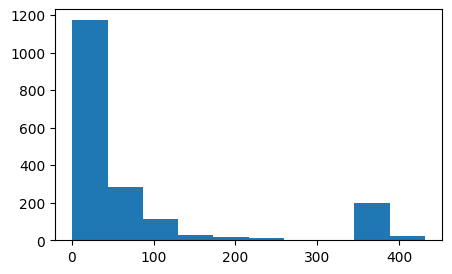

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.hist(df["Duration"], bins=10)
plt.show()


In [122]:
import numpy as np


def minmax_scale(X):
    a, b = X.max(axis=0), X.min(axis=0)
    if (a == b).all():
        x_std = X * 0.
    else:
        x_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return x_std

In [124]:
# Все числовые значения масштабируются от 0 до 1
X = minmax_scale(X)
X

,Distribution Channel,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age
24,0.0,0.025581,1.000000,0.318482,0.111793,0.0,0.200000
249,0.0,0.020930,1.000000,0.235231,0.051805,0.0,0.304762
314,0.0,0.167442,0.444537,0.189769,0.000000,0.0,0.219048
420,0.0,0.023256,1.000000,0.266089,0.074021,0.0,0.190476
425,0.0,0.846512,1.000000,0.473350,0.223396,0.0,0.180952
...,...,...,...,...,...,...,...
49241,0.0,0.183721,0.009055,0.348185,0.000000,0.0,0.219048
6243,0.0,0.151163,0.181708,0.198020,0.000000,0.0,0.219048
17800,0.0,0.030233,0.361681,0.234323,0.000000,0.0,0.219048
53328,1.0,0.006977,0.447253,0.212871,0.049950,1.0,0.247619


Подробный анализ и подготовка датасета часто помогают улучшить качество модели. Ниже представлено несколько идей преобразований. Вы можете применить одно или несколько из этих преобразований (а можете не применять), чтобы помочь будущей модели. 

1. *Посмотрите* *на количественные признаки. Возможно, в некоторых признаках есть выбросы - значения, которые сильно выбиваются. Такие значения полезно удалять. Советуем присмотреться к колонке Duration)*

2.*Можно заметить, что one hot encoding сильно раздувает количество столбцов. Радикальное решение - можно попробовать выбросить все категориальные признаки из датасета.*

3. Если все-таки оставляете категориальные признаки, то подумайте, как уменьшить количество столбцов после one hot encoding. Признаки с большим количеством значений (Duration - 149! разных стран) можно удалить или попробовать сгруппировать некоторые значения.

4. Downsampling. Датасет достаточно большой, разница в классах огромная. Можно уменьшить число наблюдений с частым ответом.

### Применение линейной регрессии (10 баллов)

Это задача классификации, но её можно решить с помощью линейной регрессии, если округлять предсказанный ответ до целого и выбирать ближайший по значению ответ из множества {0, 1}.

Вынесите признак 'Claim' в вектор ответов и разделите датасет на обучающую и тестовую выборку в соотношении 80 к 20. Зафиксируйте random_state.

**Подсказка:** быстро перевести Yes/No в 1/0 можно так - np.where(df['Claim'] == 'Yes', 1,0)

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [126]:
# разделение на test/train
X = df
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

Найдите аналитическое решение для обучающей выборки: обычное и регуляризацией l2. <br>
Аналитическое решение <br>
$$w^* = (X^TX)^{-1}X^Ty$$<br>
Аналитическое решение с L2 регуляризацией<br>
$$\hat{w} = (X^TX + \lambda^2E)^{-1}X^Ty$$

In [127]:
y = y_train
value = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y)
value

array([ 0.21177605, -0.15498702,  0.40697236,  1.03783793,  0.35171392,
        0.00963402, -0.08386729])

In [128]:
# посчитать аналитическое решение с регуляризацией
lambda_ = 1
n, k = X.shape
E = np.eye(k)
value_l2 = np.linalg.inv(X_train.T @ X_train + lambda_ * lambda_ * E) @ X_train.T @ y
value_l2

0    0.193162
1   -0.122628
2    0.412970
3    0.960367
4    0.356872
5    0.013292
6   -0.050524
dtype: float64

Постройте модель LinearRegression, примените к тестовой выборке и посчитайте MSE (можно использовать библиотеку sklearn)

In [129]:
# обучите модель линейной регрессии LinearRegression на обучающей выборке, примените к тестовой
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
predict = pred.round()

print(pred)
print(predict)

[0.34862174 0.5612539  0.37366522 0.38242608 0.1790117  0.83182399
 0.72475809 0.80123682 0.28358512 0.67891548 0.66203143 0.28811043
 0.93394814 0.58930456 0.21050413 0.36748291 0.28763187 0.20662787
 0.29169977 0.66327402 0.65742098 0.60821601 0.62411934 0.94370297
 0.28375498 1.46229716 0.32188544 0.93719166 0.32355174 0.33050509
 1.10004445 0.39768034 0.74544978 0.71324607 0.27606945 0.37224698
 0.69173894 0.36185563 0.59150916 0.37071624 0.35132735 0.50473976
 0.38070125 0.58130148 0.25124705 0.31985879 0.22104908 0.60299591
 0.39111167 0.93434327 0.28851137 0.610306   0.83537287 0.66568494
 0.31224509 0.60774853 1.17092493 0.37629504 0.34650805 0.31156093
 0.18460816 0.30036582 0.24934114 0.62321008 0.69462675 0.62914308
 0.56021214 0.2888828  0.64688651 0.35711138 0.63834844 0.26846771
 0.20083621 0.68737499 0.96264418 0.32555436 0.62118549 0.30519288
 0.56423506 0.87738464 0.62643946 0.61934988 0.30353845 0.42958473
 0.59875587 0.54011934 0.64091251 0.30916807 0.5341559  0.4762

In [130]:
# посчитайте MSE, предварительно округлив предсказанные ответы до целого
mse = mean_squared_error(y_test, predict)
mse

0.29649595687331537

In [131]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predict))

0.7035040431266847


### Вывод (1 балла)

Напишите краткий вывод по заданию (достаточно пары предложений). Расскажите, какие способы предобработки данных вы выбрали и почему. Насколько хороша ваша модель?

## Изучив датасет, я принял решение убрать часть категорийных признаков, так как они порождали за собой большое количество столбцов. Оставшиеся категорийные перевел в числовые. Применил масштабирование MinMaxScaler, предварительно убрав объекты, выделяющиеся от остальных по фиче Duration 